# Klasyfikacja ćwiczeń rehabilitacyjnych



In [ ]:
!pip install tf-nightly

## Import TensorFlow oraz innych bibliotek

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Przygotowanie dataset

Unzip data and use it for creating dataset

In [ ]:
!unzip test_rehab_set.zip
!unzip train_rehab_set.zip

Archive:  test_rehab_set.zip
   creating: test_rehab_set/
   creating: test_rehab_set/deep squat/
  inflating: test_rehab_set/deep squat/m1_s10_e1.png  
  inflating: test_rehab_set/deep squat/m1_s10_e10.png  
  inflating: test_rehab_set/deep squat/m1_s10_e2.png  
  inflating: test_rehab_set/deep squat/m1_s10_e3.png  
  inflating: test_rehab_set/deep squat/m1_s10_e4.png  
  inflating: test_rehab_set/deep squat/m1_s10_e5.png  
  inflating: test_rehab_set/deep squat/m1_s10_e6.png  
  inflating: test_rehab_set/deep squat/m1_s10_e7.png  
  inflating: test_rehab_set/deep squat/m1_s10_e8.png  
  inflating: test_rehab_set/deep squat/m1_s10_e9.png  
  inflating: test_rehab_set/deep squat/m1_s1_e1.png  
  inflating: test_rehab_set/deep squat/m1_s1_e10.png  
  inflating: test_rehab_set/deep squat/m1_s1_e2.png  
  inflating: test_rehab_set/deep squat/m1_s1_e3.png  
  inflating: test_rehab_set/deep squat/m1_s1_e4.png  
  inflating: test_rehab_set/deep squat/m1_s1_e5.png  
  inflating: test_rehab_se

In [ ]:
batch_size = 32
img_height = 40
img_width = 40
data_dir_train = '/content/train_rehab_set'
data_dir_test = '/content/test_rehab_set'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 10 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 10 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['deep squat', 'hurdle step', 'inline lunge', 'side lunge', 'sit to stand', 'standing active straight leg raise', 'standing shoulder abduction', 'standing shoulder extension', 'standing shoulder internal-external rotation', 'standing shoulder scaption']


## Wizualizacja danych

Pierwsze 9 obrazków ze zbioru trenującego.

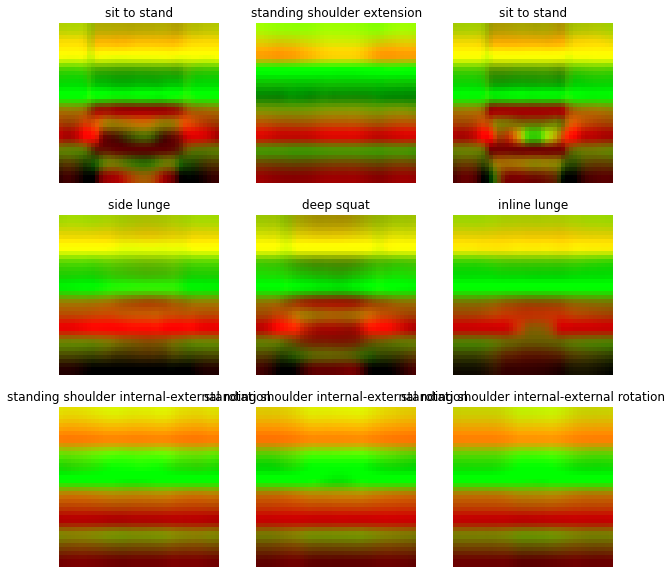

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Konfiguracja wydajności dataset


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Stworzenie modelu

In [ ]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Podsumowanie modelu:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

## Trening

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 3s 69ms/step - loss: 2.2560 - accuracy: 0.1880 - val_loss: 1.7875 - val_accuracy: 0.5410
Epoch 2/10
32/32 [==============================] - 2s 54ms/step - loss: 1.4139 - accuracy: 0.5459 - val_loss: 0.7872 - val_accuracy: 0.6960
Epoch 3/10
32/32 [==============================] - 2s 54ms/step - loss: 0.5422 - accuracy: 0.8183 - val_loss: 0.5572 - val_accuracy: 0.7710
Epoch 4/10
32/32 [==============================] - 2s 53ms/step - loss: 0.3010 - accuracy: 0.8970 - val_loss: 0.5124 - val_accuracy: 0.8200
Epoch 5/10
32/32 [==============================] - 2s 56ms/step - loss: 0.1548 - accuracy: 0.9589 - val_loss: 0.6263 - val_accuracy: 0.8170
Epoch 6/10
32/32 [==============================] - 2s 55ms/step - loss: 0.1375 - accuracy: 0.9551 - val_loss: 0.6062 - val_accuracy: 0.8240
Epoch 7/10
32/32 [==============================] - 2s 55ms/step - loss: 0.1198 - accuracy: 0.9699 - val_loss: 0.6194 - val_accuracy: 0.8160
Epoch 8/10
32

## Wizualizacja progresu

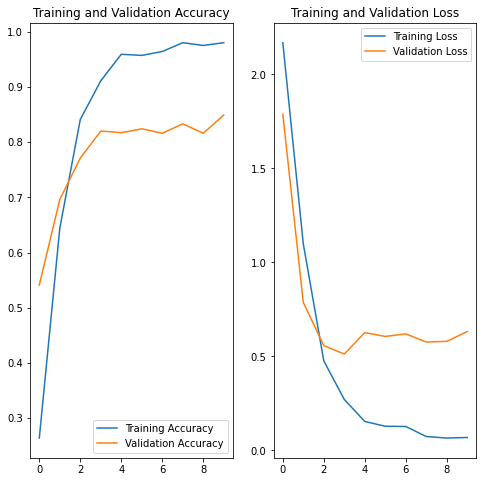

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.

Let's look at what went wrong and try to increase the overall performance of the model.

# Export modelu do formatu LITE

In [ ]:
model.save("saved_model")

import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model')
tflite_model = converter.convert()
open("rehabnet_img_model.tflite", "wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/assets


922060